# Improve your images

First make sure you select **GPU** as runtime type under Runtime > Runtime Type

In [12]:
!pip install --force tqdm==4.24.0
!pip uninstall keras-nightly
!pip uninstall -y tensorflow
!pip install keras==2.1.6
!pip install tensorflow==1.15.0
!pip install h5py==2.10.0

  Using cached https://files.pythonhosted.org/packages/7d/e6/19dfaff08fcbee7f3453e5b537e65a8364f1945f921a36d08be1e2ff3475/tqdm-4.24.0-py2.py3-none-any.whl
  Found existing installation: tqdm 4.24.0
    Uninstalling tqdm-4.24.0:
      Successfully uninstalled tqdm-4.24.0
You should consider upgrading via the 'pip install --upgrade pip' command.
     |████████████████████████████████| 348kB 8.3MB/s eta 0:00:01
     |████████████████████████████████| 686kB 51.3MB/s eta 0:00:01
  Found existing installation: keras 2.10.0
    Uninstalling keras-2.10.0:
      Successfully uninstalled keras-2.10.0
You should consider upgrading via the 'pip install --upgrade pip' command.
     |████████████████████████████████| 412.3MB 33kB/s s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [17]:
!pip install cmake
!pip install boost
!pip install dlib

  Using cached https://files.pythonhosted.org/packages/2f/a1/aed90f63609db7af7bbd9a6ad8bcc28b710ed58db3ebf0e7c92ce1d04f26/cmake-3.28.4-py2.py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl
You should consider upgrading via the 'pip install --upgrade pip' command.
     |████████████████████████████████| 71kB 6.1MB/s eta 0:00:011
     |████████████████████████████████| 1.6MB 15.3MB/s eta 0:00:01
     |████████████████████████████████| 573kB 49.2MB/s eta 0:00:01
  Created wheel for boost: filename=boost-0.1-cp36-none-any.whl size=13396 sha256=575cc4600ef549bb6798301b35133907337f919fb35907b631dd27a7dc290438
  Stored in directory: /root/.cache/pip/wheels/c9/7e/e1/dfb3e41d0b764a6fbb0d926f3dd67c2b729170643ff6558d65
Successfully built boost
You should consider upgrading via the 'pip install --upgrade pip' command.
  Using cached https://files.pythonhosted.org/packages/2e/9d/4e1003c044bdb07f7c0d83ae87d694e10e5a6c296b84566aa9a6ec9eed2a/dlib-19.24.2.tar.gz
  Installing build dependencies ..

In [26]:
!pip install imutils

  Created wheel for imutils: filename=imutils-0.5.4-cp36-none-any.whl size=26742 sha256=acebc53322ff782132487ee1c3889ded0e2796c09a3b3cb7d25784b716405bee
  Stored in directory: /root/.cache/pip/wheels/db/23/45/fc7424906880ffa9577a2a428b961f2b79e0e21d9f71e7e6bc
Successfully built imutils
You should consider upgrading via the 'pip install --upgrade pip' command.


In [37]:
# install cv2
!pip install --upgrade pip setuptools wheel
!pip install opencv-python --verbose

Using pip 21.3.1 from /usr/local/lib/python3.6/dist-packages/pip (python 3.6)
  Using cached opencv-python-4.9.0.80.tar.gz (92.9 MB)
  Running command /usr/bin/python3 /usr/local/lib/python3.6/dist-packages/pip install --ignore-installed --no-user --prefix /tmp/pip-build-env-sby_281r/overlay --no-warn-script-location --no-binary :none: --only-binary :none: -i https://pypi.org/simple -- 'cmake>=3.1' 'numpy==1.13.3; python_version=='"'"'3.6'"'"' and platform_machine != '"'"'aarch64'"'"' and platform_machine != '"'"'arm64'"'"'' 'numpy==1.17.0; python_version=='"'"'3.7'"'"' and platform_machine != '"'"'aarch64'"'"' and platform_machine != '"'"'arm64'"'"'' 'numpy==1.17.5; python_version=='"'"'3.8'"'"' and platform_machine != '"'"'aarch64'"'"' and platform_machine != '"'"'arm64'"'"'' 'numpy==1.19.3; python_version<='"'"'3.9'"'"' and sys_platform == '"'"'linux'"'"' and platform_machine == '"'"'aarch64'"'"'' 'numpy==1.21.0; python_version<='"'"'3.9'"'"' and sys_platform == '"'"'darwin'"'"' and

In [1]:
# %tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)
print(tf.test.gpu_device_name())

1.15.0
/device:GPU:0


## Using Google Drive

Google Colab does not store data after you close the session.
We will be using Google Drive to permanently store created images and latent vectors.

If you don't want to use Google Drive you can skip this step, just make sure you download the results you want to keep then.

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')
# %cd /content/drive/My\ Drive

## Getting started

Alright, now that the annoying part is done. Let's get started!

First we need to clone the Repo and open the directory.

In [5]:
# !git clone https://github.com/ju-leon/RetouchML.git

In [2]:
%cd app/
# !mkdir aligned_images raw_images alignement_vector out
# %ls

/app


In [3]:
import glob, os
import PIL.Image

## Upload your image

To use your own image, upload it into the raw_iamges folder. Then hit run so see if its there...

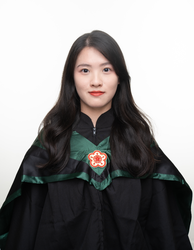

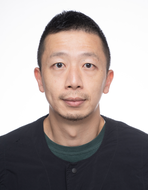

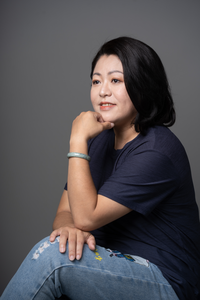

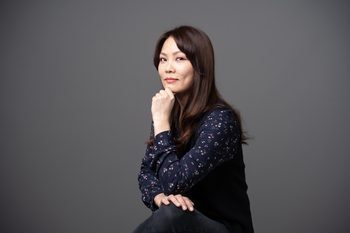

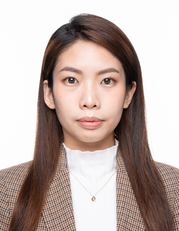

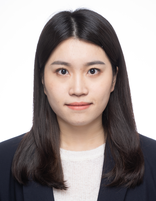

In [6]:
path = "raw_images/"
valid_images = (".jpg",".png")
for f in os.listdir(path):
    if f.endswith(valid_images):
        img = PIL.Image.open(path + f)
        display(img.resize((int(img.size[0]/20), int(img.size[1]/20)), PIL.Image.LANCZOS))


## Aligning images

All there?
Then let's go ahead and crop on the head.
Run the following skripts to crop and see the results.

In [7]:
!python align_images.py raw_images/ aligned_images/ alignement_vector/

Using TensorFlow backend.


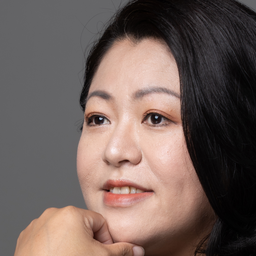

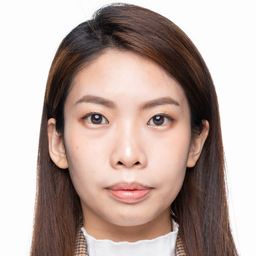

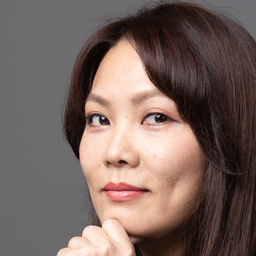

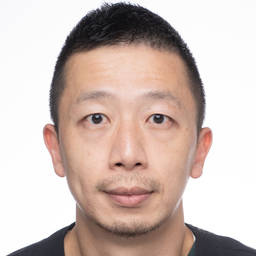

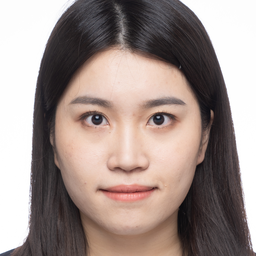

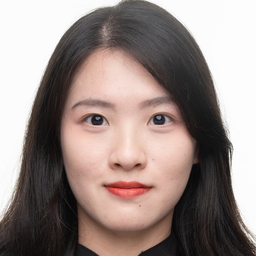

In [8]:
path = "aligned_images/"
for f in os.listdir(path):
    if f.endswith(valid_images):
        img = PIL.Image.open(path + f)
        display(img.resize((256,256), PIL.Image.LANCZOS))

## Encoding

Now comes the fun part. We need to translate what we can see into a latent vector.
for that we will use a StyleGan encoder.

This will take a while, so sit back and let Googles GPU do their jobs...

In [20]:
!python encode_images.py --help

Using TensorFlow backend.
usage: encode_images.py [-h] [--data_dir DATA_DIR] [--mask_dir MASK_DIR]
                        [--load_last LOAD_LAST] [--dlatent_avg DLATENT_AVG]
                        [--model_url MODEL_URL] [--model_res MODEL_RES]
                        [--batch_size BATCH_SIZE] [--optimizer OPTIMIZER]
                        [--vgg_url VGG_URL] [--image_size IMAGE_SIZE]
                        [--resnet_image_size RESNET_IMAGE_SIZE] [--lr LR]
                        [--decay_rate DECAY_RATE] [--iterations ITERATIONS]
                        [--decay_steps DECAY_STEPS]
                        [--early_stopping [EARLY_STOPPING]]
                        [--early_stopping_threshold EARLY_STOPPING_THRESHOLD]
                        [--early_stopping_patience EARLY_STOPPING_PATIENCE]
                        [--load_effnet LOAD_EFFNET]
                        [--load_resnet LOAD_RESNET]
                        [--use_preprocess_input [USE_PREPROCESS_INPUT]]
                 

In [9]:
!python encode_images.py aligned_images/ generated_images/ latent_representations/ \
    --vgg_url=https://rolux.org/media/stylegan/vgg16_zhang_perceptual.pkl \
    --lr=0.4 --iterations=200 \
    --use_best_loss=True --early_stopping=True --load_resnet=True

Using TensorFlow backend.
Namespace(average_best_loss=0.25, batch_size=1, clipping_threshold=2.0, composite_blur=8, composite_mask=True, data_dir='data', decay_rate=0.9, decay_steps=4, dlatent_avg='', dlatent_dir='latent_representations/', early_stopping=True, early_stopping_patience=10, early_stopping_threshold=0.5, face_mask=True, generated_images_dir='generated_images/', image_size=256, iterations=200, load_effnet='data/finetuned_effnet.h5', load_last='', load_mask=False, load_resnet='True', lr=0.4, mask_dir='masks', model_res=1024, model_url='gdrive:networks/stylegan2-ffhq-config-f.pkl', optimizer='ggt', output_video=False, randomize_noise=False, resnet_image_size=256, scale_mask=1.4, sharpen_input=True, src_dir='aligned_images/', tile_dlatents=False, use_adaptive_loss=False, use_best_loss=True, use_discriminator_loss=0.5, use_grabcut=True, use_l1_penalty=0.5, use_lpips_loss=100, use_mssim_loss=200, use_pixel_loss=1.5, use_preprocess_input=True, use_vgg_layer=9, use_vgg_loss=0.4, v

### Result

And here we go. The following image is the encoded image in latent sapce. It should look pretty similar to the original representation, although it might vary slightly.


If you're not happy with the result try running the encoding again with different parameters.

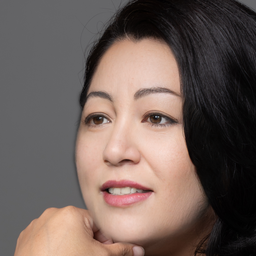

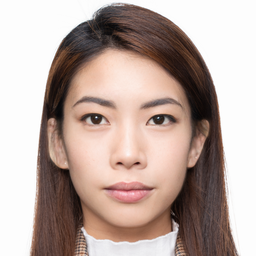

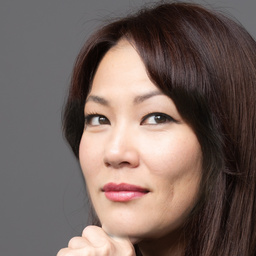

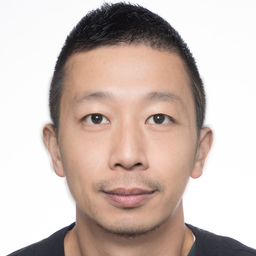

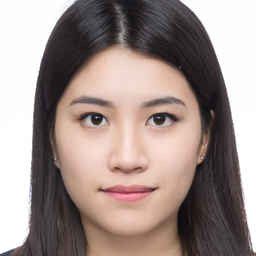

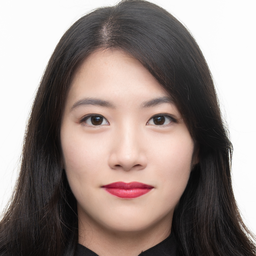

In [10]:
path = "generated_images/"
for f in os.listdir(path):
    if f.endswith(valid_images):
        img = PIL.Image.open(path + f)
        display(img.resize((256,256), PIL.Image.LANCZOS))

In [ ]:
## place crop image back to raw image

In [ ]:
# import keras
# model = keras.models.load_model('/app/models/no_pca.keras')

In [24]:
# import math
# import pickle
# import PIL.Image
# import numpy as np
# #import config
# import dnnlib
# import dnnlib.tflib as tflib
# from encoder.generator_model import Generator
# URL_FFHQ = 'http://d36zk2xti64re0.cloudfront.net/stylegan2/networks/stylegan2-ffhq-config-f.pkl'
# tflib.init_tf()
# with dnnlib.util.open_url(URL_FFHQ, cache_dir="cache") as f:
#     generator_network, discriminator_network, Gs_network = pickle.load(f)

# generator = Generator(Gs_network, batch_size=1, randomize_noise=False)

# model_res = 1024
# model_scale = int(2*(math.log(model_res,2)-1))

# def generate_raw_image(latent_vector):
#     latent_vector = latent_vector.reshape((1, model_scale, 512))
#     generator.set_dlatents(latent_vector)
#     return generator.generate_images()[0]

# def generate_image(latent_vector):
#     img_array = generate_raw_image(latent_vector)
#     img = PIL.Image.fromarray(img_array, 'RGB')
#     return img

Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Loading... Done.


#### Computing the gradient

In order to improve the face, we'll follow the gradient.
This should give us a better version of the image that is still close to the original image.

In [ ]:
# import copy
# from tqdm import tqdm

# latent_vector = np.load('/content/drive/My Drive/RetouchML/latent_representations/merkel_01.npy')
# img = generate_image(latent_vector)
# display(img.resize((512,512),PIL.Image.LANCZOS))

# predictions = model.predict(latent_vector).reshape(-1)
# print(np.mean(predictions))


# for x in range(2):
#   x_tensor = tf.convert_to_tensor(latent_vector, dtype=tf.float32)

#   with tf.GradientTape() as t:
#       t.watch(x_tensor)
#       output = model(x_tensor)

#   gradients = tf.gradients(output, x_tensor)

#   with tf.Session() as sess:
#     sess.run(tf.global_variables_initializer())
#     result_output=np.array(sess.run(gradients)).reshape(18,512)

#   latent_vector += result_output
#   print(np.mean(model.predict(latent_vector)))
#   img = generate_image(latent_vector)
#   display(img.resize((512,512),PIL.Image.LANCZOS))

# predictions = model.predict(latent_vector).reshape(-1)
# print(predictions)

# img = generate_image(latent_vector)
# display(img.resize((512,512),PIL.Image.LANCZOS))
# img.save("generated_images/merkel_01.png", "PNG")

In [13]:
#/content/RetouchML/masks/IMG_20200209_150540_01.png
#/content/drive/My Drive/RetouchML/raw_images/pexels-anna-shvets-4672292.jpg
#/content/drive/My Drive/RetouchML/raw_images/pexels-sound-on-3756989.jpg
for img_name in ["12", "13", "14"]:
    raw_path = "raw_images/" + img_name + ".jpg"
    out_path = "out/" + img_name + "_01.jpg"
    face_path = "generated_images/" 
    mask_path = "masks/"
    vector_path = "alignement_vector/"
    !python fit_faces.py $raw_path $face_path $mask_path $vector_path $out_path


Using TensorFlow backend.
Done!
Using TensorFlow backend.
Done!
Using TensorFlow backend.
Done!


In [ ]:
path = "out/"
valid_images = (".jpg",".png")
for f in os.listdir(path):
    if f.endswith(valid_images):
        img = PIL.Image.open(path + f)
        display(img.resize((int(img.size[0]/3), int(img.size[1]/3)), PIL.Image.LANCZOS))


#### Done

And that's it. The difference is subtle but in direct comaprison with the original images, you can clearly see the changes.